In [915]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain

#%matplotlib_inline

In [916]:
cirrhosis_df = pd.read_csv("C:\\Users\\parim\\Downloads\\MC_Cirrhosis Outcomes\\train.csv")

In [917]:
cirrhosis_df.shape

(7905, 20)

In [918]:
cirrhosis_df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [919]:
cirrhosis_df['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [920]:
cirrhosis_df.head(5)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [921]:
cirrhosis_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [922]:
cirrhosis_df["Drug"].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [923]:
cirrhosis_df["Ascites"].unique()

array(['N', 'Y'], dtype=object)

In [924]:
cirrhosis_df["Hepatomegaly"].unique()

array(['N', 'Y'], dtype=object)

In [925]:
cirrhosis_df['Spiders'].unique()

array(['N', 'Y'], dtype=object)

In [926]:
cirrhosis_df['Edema'].unique()

array(['N', 'Y', 'S'], dtype=object)

In [927]:
cirrhosis_df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [928]:
#oneHotEnc = OneHotEncoder()
#cirrhosis_df = oneHotEnc.fit(cirrhosis_df)

In [929]:
cirrhosis_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [930]:
#output_label_mapping = {"D":1, "C":2, "CL":3}
#cirrhosis_df['Status'] = cirrhosis_df['Status'].replace(output_label_mapping)
#cirrhosis_df.head(5)

In [931]:
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
cirrhosis_df_encoded = pd.get_dummies(cirrhosis_df, columns=categorical_cols, dtype=int)

In [932]:
cirrhosis_df_encoded.head(5)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,...,1,0,1,0,1,0,0,0,0,1
1,1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,...,1,0,1,0,1,0,0,1,0,0
2,2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,...,0,1,0,1,0,0,1,0,0,1
3,3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,...,1,0,1,0,1,0,0,1,0,0
4,4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,...,0,1,1,0,1,0,0,1,0,0


Text(0, 0.5, 'Stage')

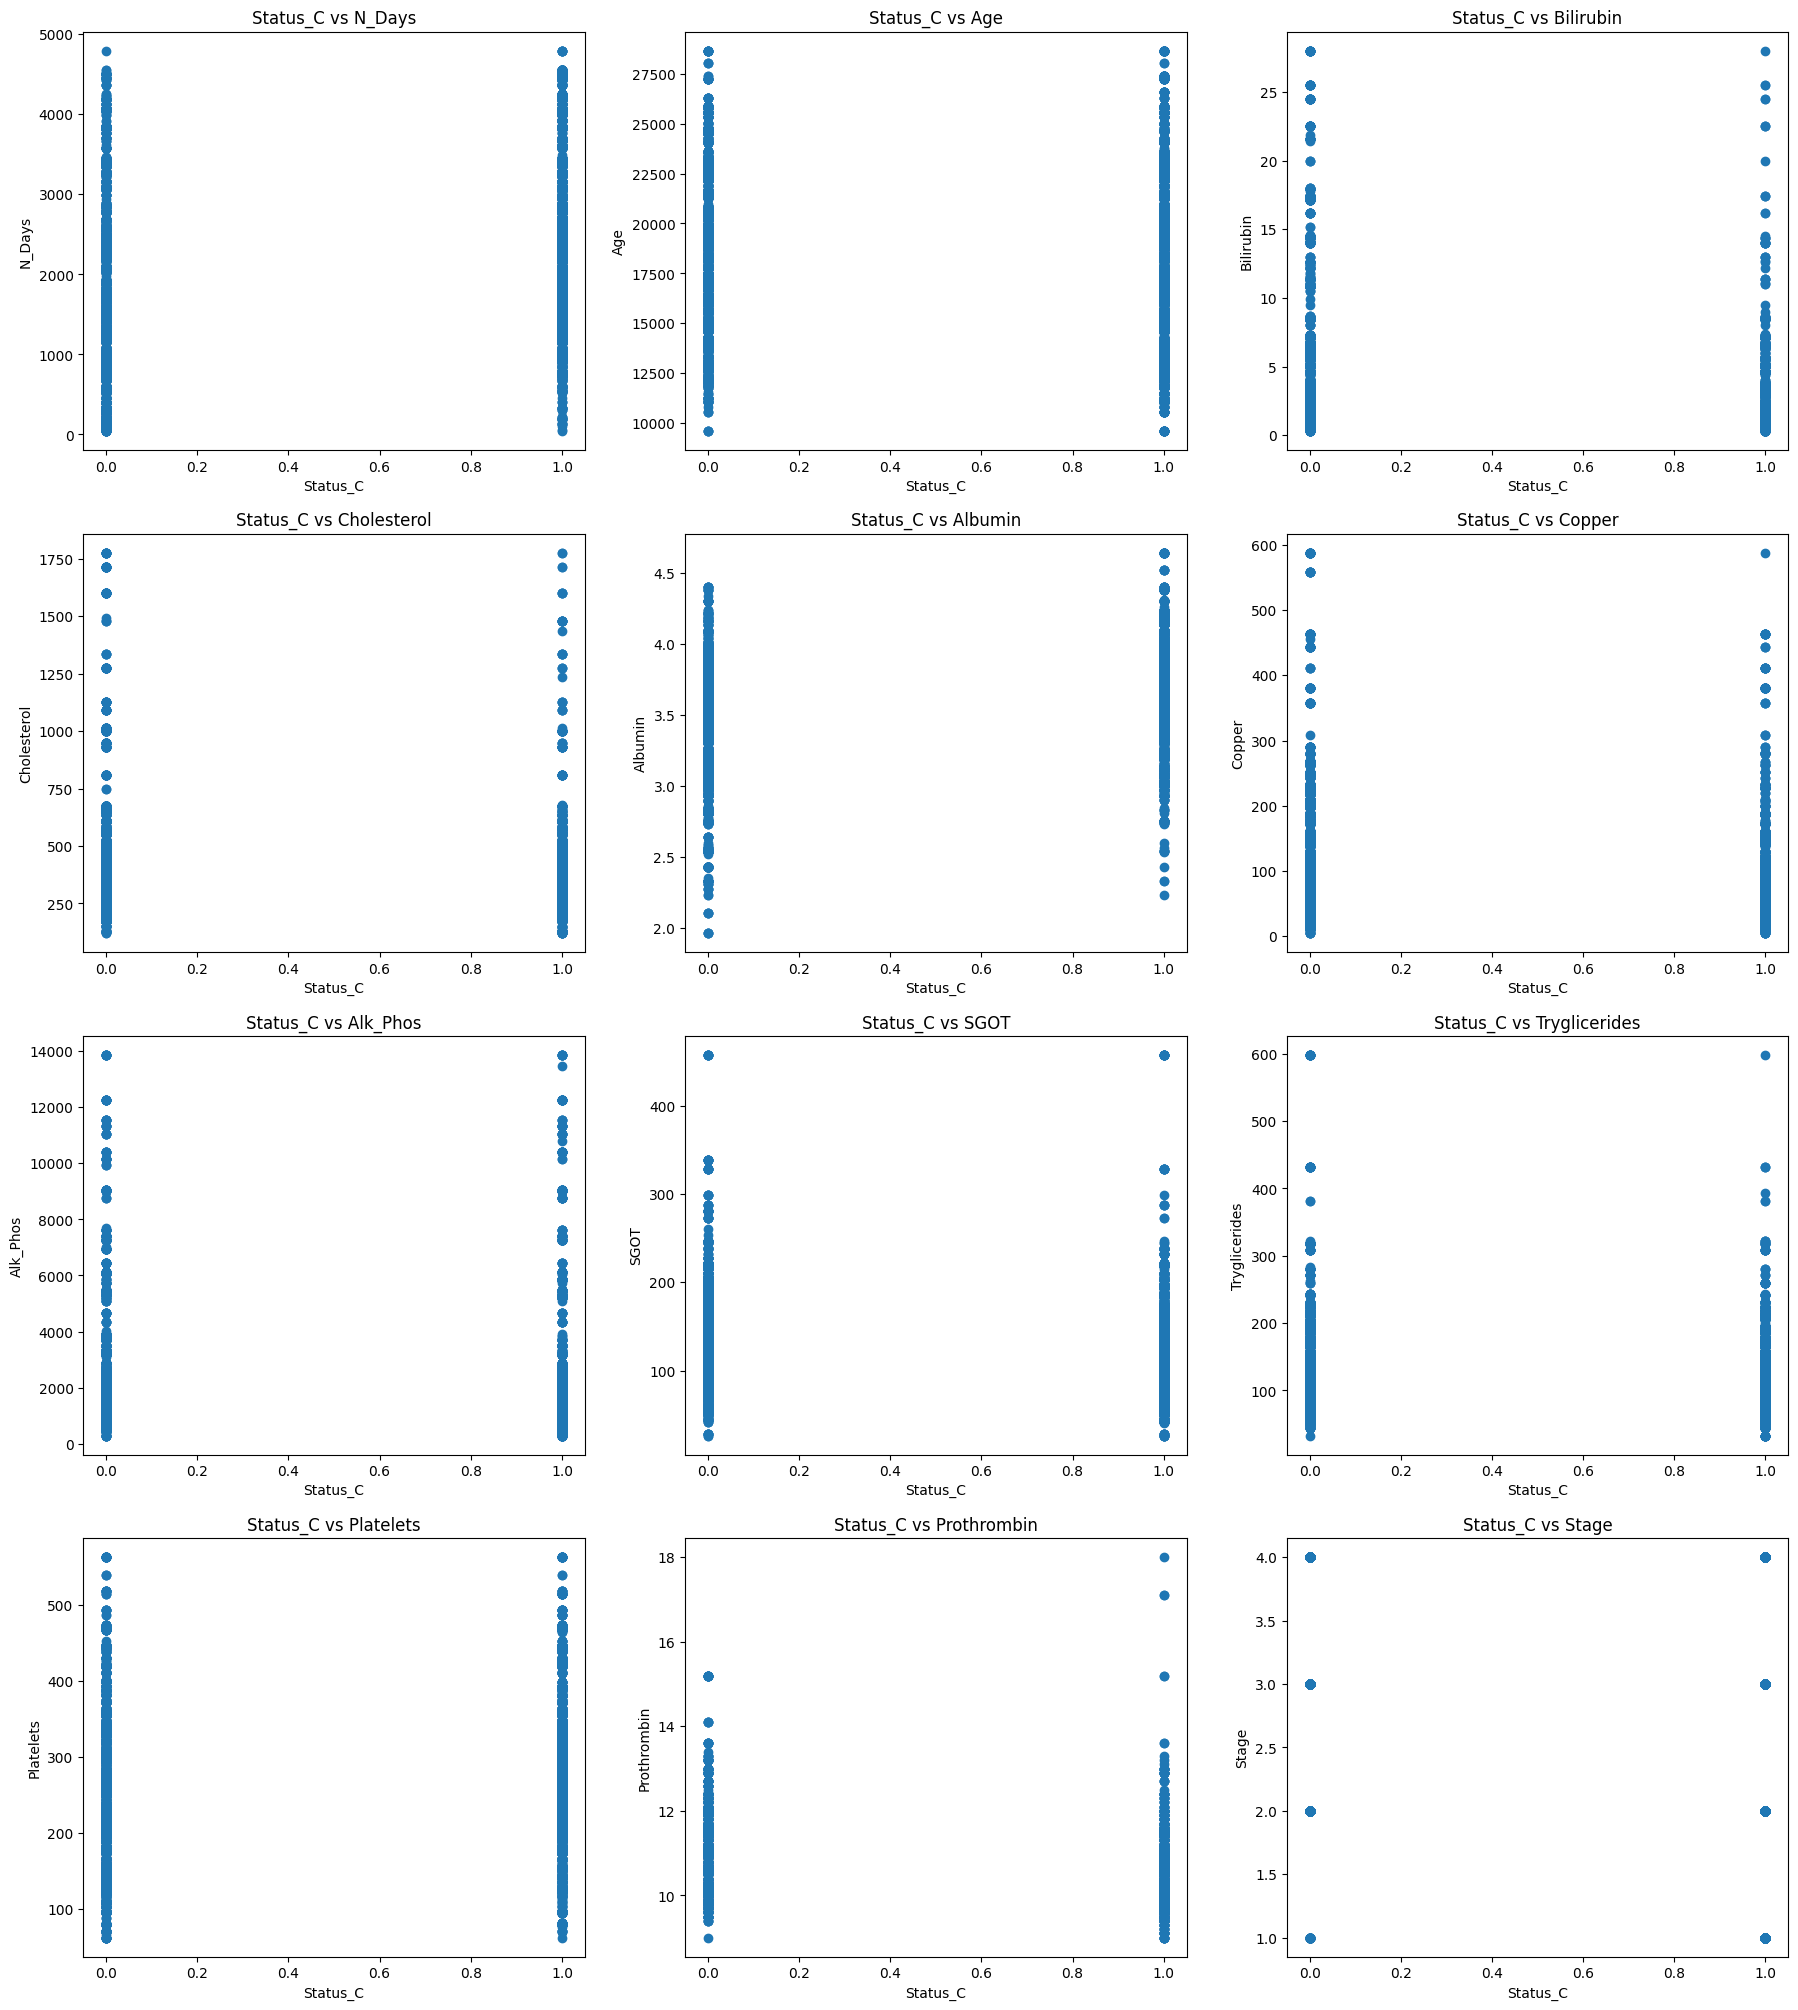

In [933]:
fig, axs = plt.subplots(4, 3, figsize=(22, 25))
axs[0, 0].scatter(cirrhosis_df_encoded['Status_C'],cirrhosis_df_encoded['N_Days'])
axs[0, 0].set_title("Status_C vs N_Days")
axs[0, 0].set_xlabel("Status_C")
axs[0, 0].set_ylabel("N_Days")
axs[0, 1].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Age'])
axs[0, 1].set_title("Status_C vs Age")
axs[0, 1].set_xlabel("Status_C")
axs[0, 1].set_ylabel("Age")
axs[0, 2].scatter(cirrhosis_df_encoded['Status_C'],cirrhosis_df_encoded['Bilirubin'])
axs[0, 2].set_title("Status_C vs Bilirubin")
axs[0, 2].set_xlabel("Status_C")
axs[0, 2].set_ylabel("Bilirubin")
axs[1, 0].scatter(cirrhosis_df_encoded['Status_C'],cirrhosis_df_encoded['Cholesterol'])
axs[1, 0].set_title("Status_C vs Cholesterol")
axs[1, 0].set_xlabel("Status_C")
axs[1, 0].set_ylabel("Cholesterol")
axs[1, 1].scatter(cirrhosis_df_encoded['Status_C'],cirrhosis_df_encoded['Albumin'])
axs[1, 1].set_title("Status_C vs Albumin")
axs[1, 1].set_xlabel("Status_C")
axs[1, 1].set_ylabel("Albumin")
axs[1, 2].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Copper'])
axs[1, 2].set_title("Status_C vs Copper")
axs[1, 2].set_xlabel("Status_C")
axs[1, 2].set_ylabel("Copper")
axs[2, 0].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Alk_Phos'])
axs[2, 0].set_title("Status_C vs Alk_Phos")
axs[2, 0].set_xlabel("Status_C")
axs[2, 0].set_ylabel("Alk_Phos")
axs[2, 1].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['SGOT'])
axs[2, 1].set_title("Status_C vs SGOT")
axs[2, 1].set_xlabel("Status_C")
axs[2, 1].set_ylabel("SGOT")
axs[2, 2].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Tryglicerides'])
axs[2, 2].set_title("Status_C vs Tryglicerides")
axs[2, 2].set_xlabel("Status_C")
axs[2, 2].set_ylabel("Tryglicerides")
axs[3, 0].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Platelets'])
axs[3, 0].set_title("Status_C vs Platelets")
axs[3, 0].set_xlabel("Status_C")
axs[3, 0].set_ylabel("Platelets")
axs[3, 1].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Prothrombin'])
axs[3, 1].set_title("Status_C vs Prothrombin")
axs[3, 1].set_xlabel("Status_C")
axs[3, 1].set_ylabel("Prothrombin")
axs[3, 2].scatter(cirrhosis_df_encoded['Status_C'], cirrhosis_df_encoded['Stage'])
axs[3, 2].set_title("Status_C vs Stage")
axs[3, 2].set_xlabel("Status_C")
axs[3, 2].set_ylabel("Stage")

Text(0, 0.5, 'Stage')

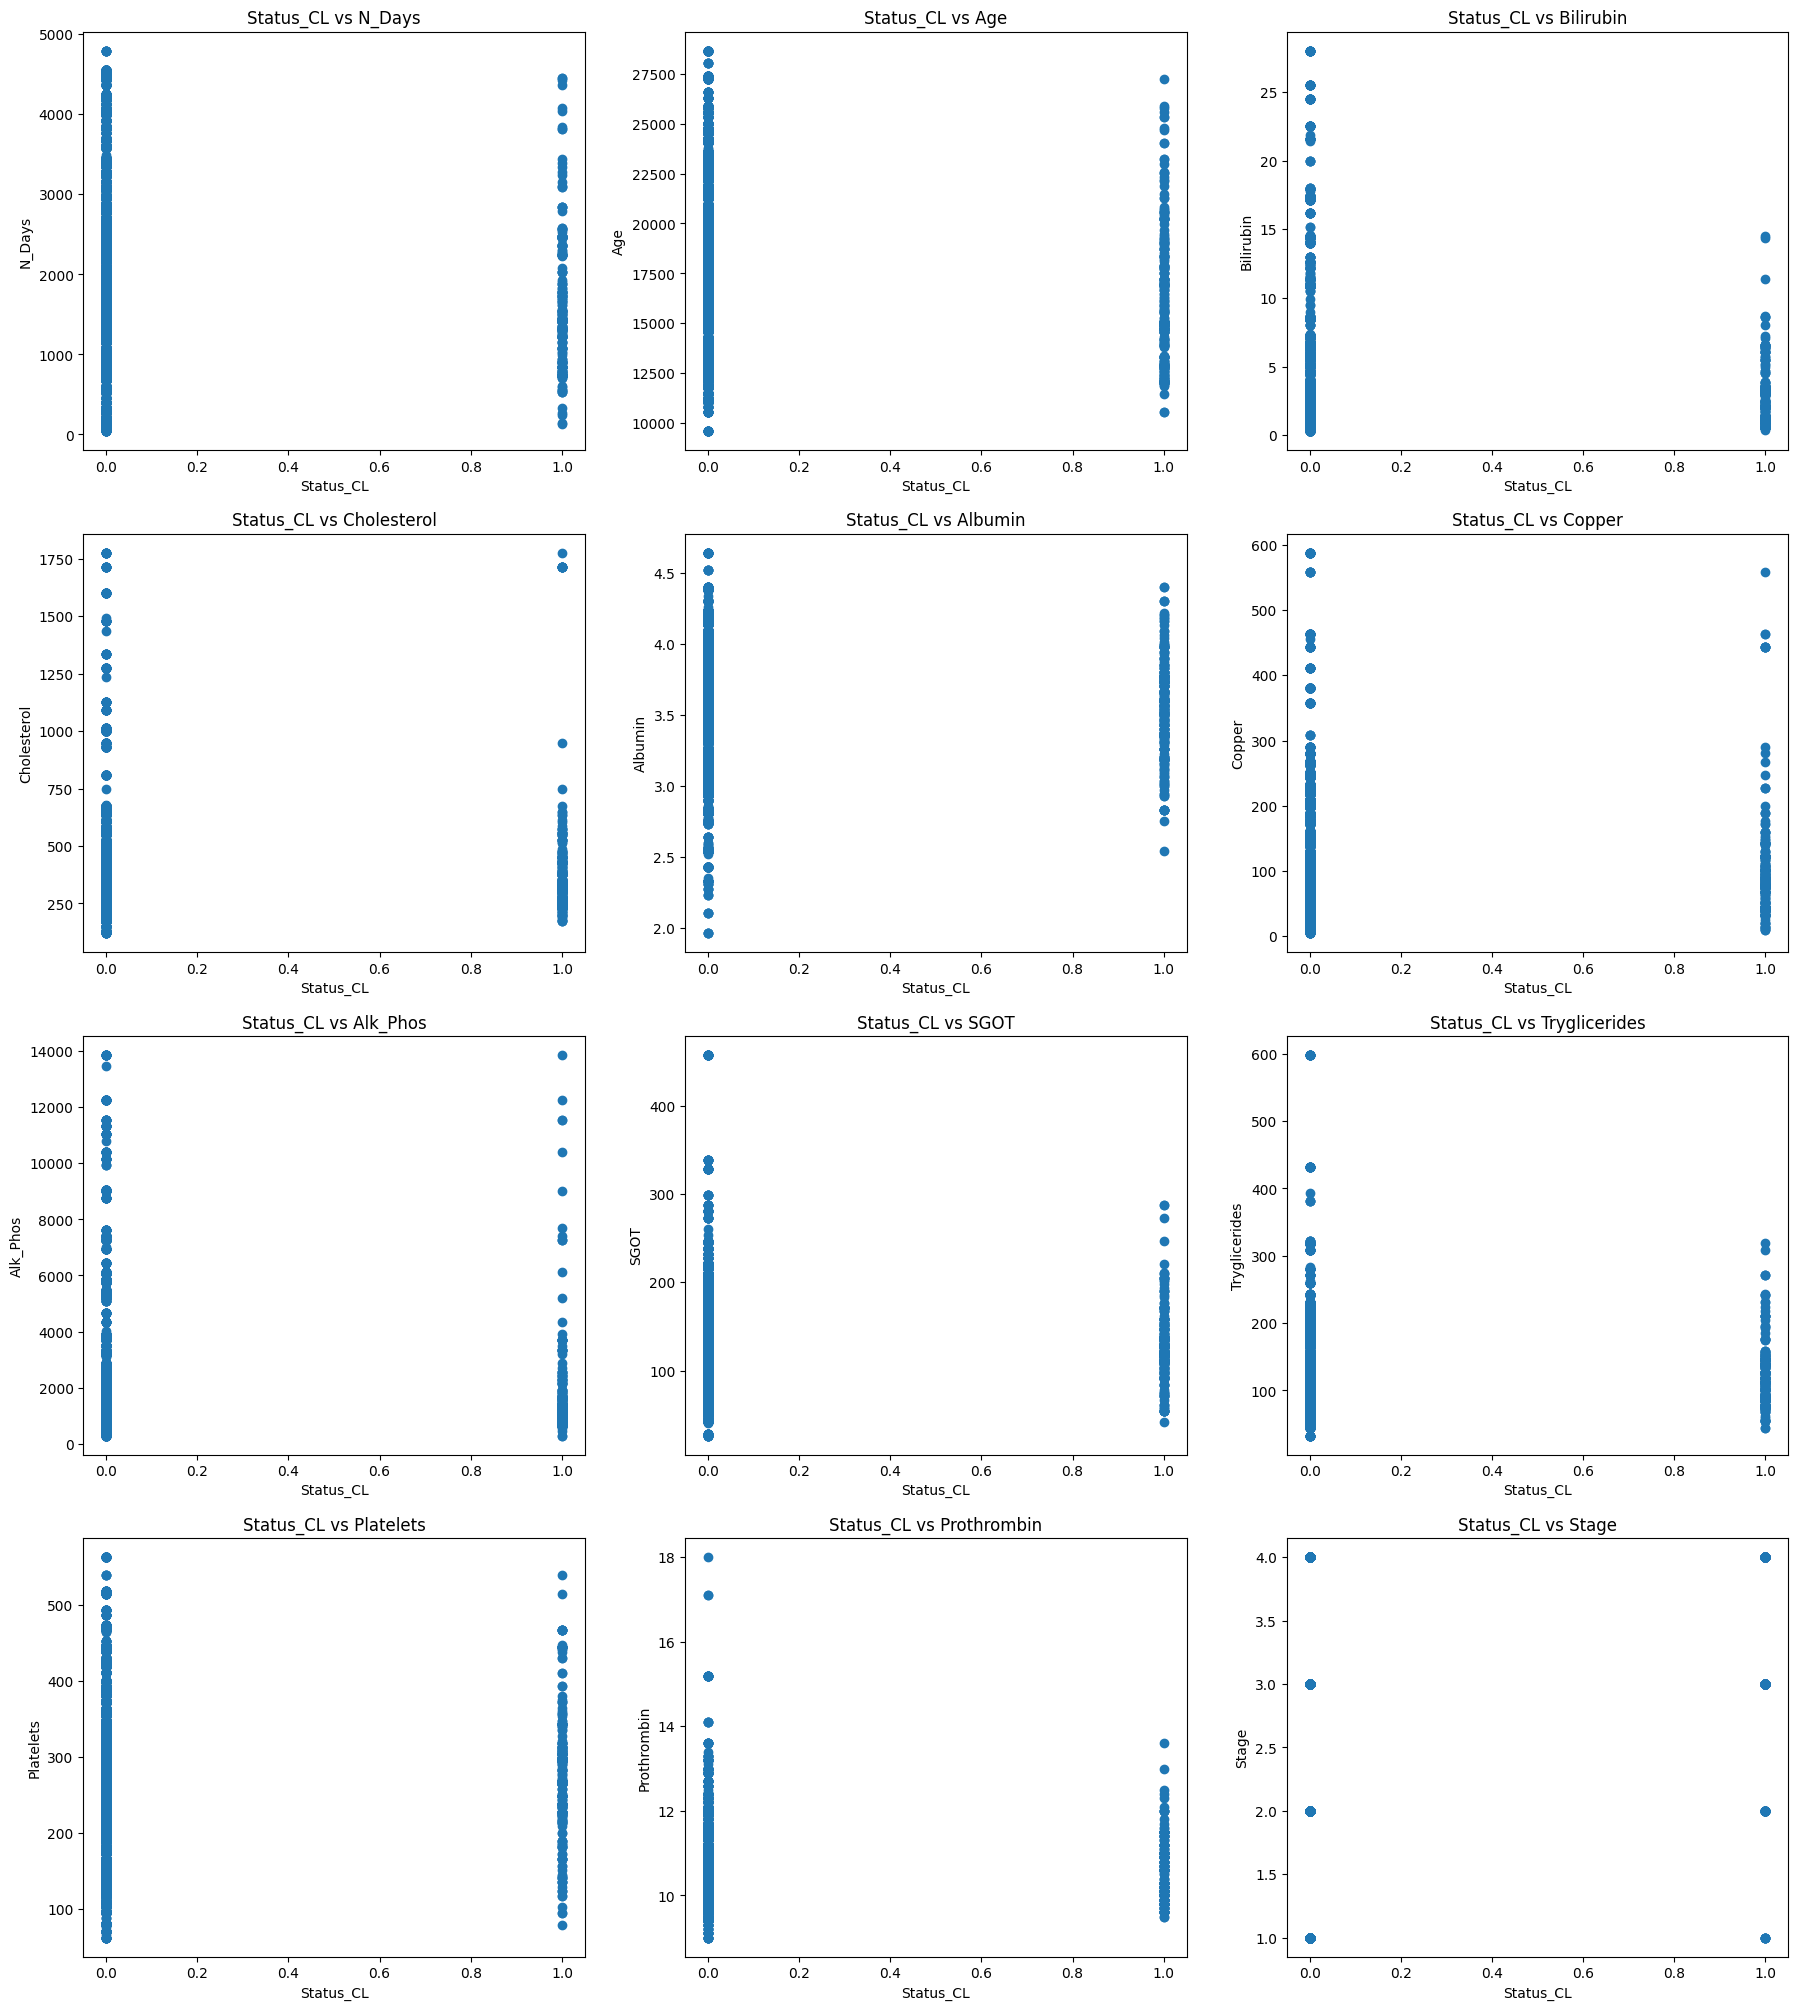

In [934]:
fig, axs = plt.subplots(4, 3, figsize=(22, 25))
axs[0, 0].scatter(cirrhosis_df_encoded['Status_CL'],cirrhosis_df_encoded['N_Days'])
axs[0, 0].set_title("Status_CL vs N_Days")
axs[0, 0].set_xlabel("Status_CL")
axs[0, 0].set_ylabel("N_Days")
axs[0, 1].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Age'])
axs[0, 1].set_title("Status_CL vs Age")
axs[0, 1].set_xlabel("Status_CL")
axs[0, 1].set_ylabel("Age")
axs[0, 2].scatter(cirrhosis_df_encoded['Status_CL'],cirrhosis_df_encoded['Bilirubin'])
axs[0, 2].set_title("Status_CL vs Bilirubin")
axs[0, 2].set_xlabel("Status_CL")
axs[0, 2].set_ylabel("Bilirubin")
axs[1, 0].scatter(cirrhosis_df_encoded['Status_CL'],cirrhosis_df_encoded['Cholesterol'])
axs[1, 0].set_title("Status_CL vs Cholesterol")
axs[1, 0].set_xlabel("Status_CL")
axs[1, 0].set_ylabel("Cholesterol")
axs[1, 1].scatter(cirrhosis_df_encoded['Status_CL'],cirrhosis_df_encoded['Albumin'])
axs[1, 1].set_title("Status_CL vs Albumin")
axs[1, 1].set_xlabel("Status_CL")
axs[1, 1].set_ylabel("Albumin")
axs[1, 2].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Copper'])
axs[1, 2].set_title("Status_CL vs Copper")
axs[1, 2].set_xlabel("Status_CL")
axs[1, 2].set_ylabel("Copper")
axs[2, 0].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Alk_Phos'])
axs[2, 0].set_title("Status_CL vs Alk_Phos")
axs[2, 0].set_xlabel("Status_CL")
axs[2, 0].set_ylabel("Alk_Phos")
axs[2, 1].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['SGOT'])
axs[2, 1].set_title("Status_CL vs SGOT")
axs[2, 1].set_xlabel("Status_CL")
axs[2, 1].set_ylabel("SGOT")
axs[2, 2].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Tryglicerides'])
axs[2, 2].set_title("Status_CL vs Tryglicerides")
axs[2, 2].set_xlabel("Status_CL")
axs[2, 2].set_ylabel("Tryglicerides")
axs[3, 0].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Platelets'])
axs[3, 0].set_title("Status_CL vs Platelets")
axs[3, 0].set_xlabel("Status_CL")
axs[3, 0].set_ylabel("Platelets")
axs[3, 1].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Prothrombin'])
axs[3, 1].set_title("Status_CL vs Prothrombin")
axs[3, 1].set_xlabel("Status_CL")
axs[3, 1].set_ylabel("Prothrombin")
axs[3, 2].scatter(cirrhosis_df_encoded['Status_CL'], cirrhosis_df_encoded['Stage'])
axs[3, 2].set_title("Status_CL vs Stage")
axs[3, 2].set_xlabel("Status_CL")
axs[3, 2].set_ylabel("Stage")

Text(0, 0.5, 'Stage')

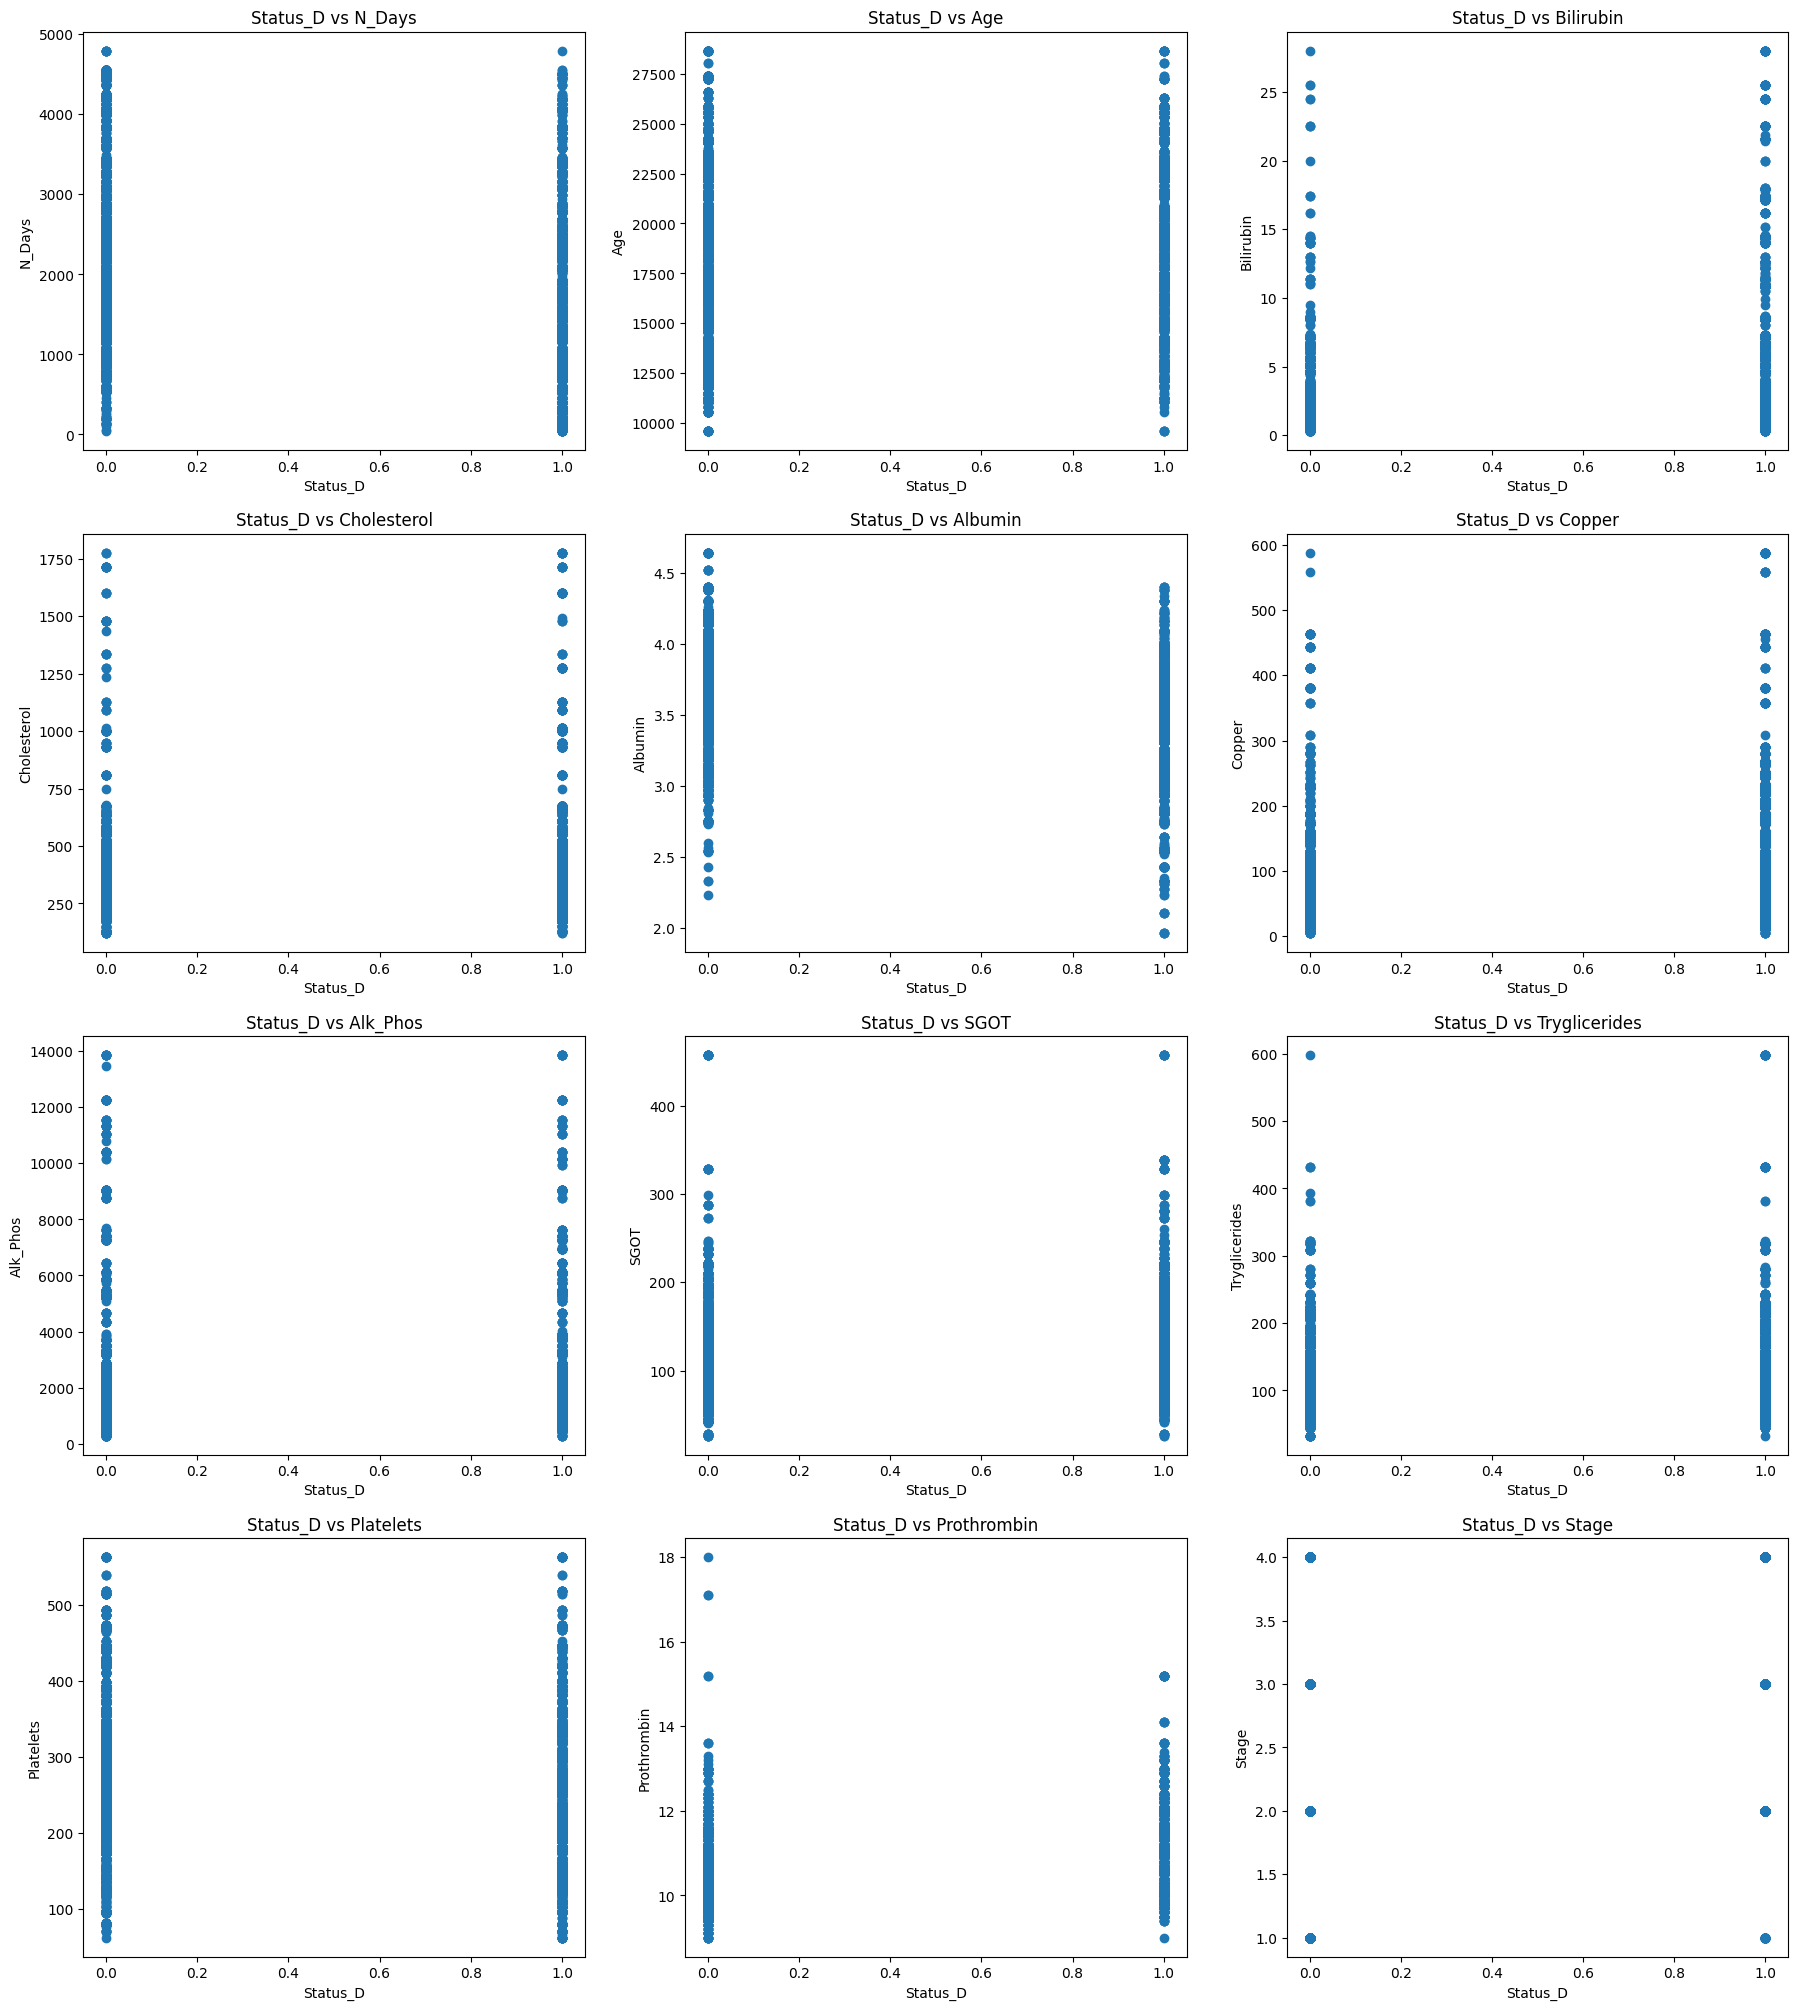

In [935]:
fig, axs = plt.subplots(4, 3, figsize=(22, 25))
axs[0, 0].scatter(cirrhosis_df_encoded['Status_D'],cirrhosis_df_encoded['N_Days'])
axs[0, 0].set_title("Status_D vs N_Days")
axs[0, 0].set_xlabel("Status_D")
axs[0, 0].set_ylabel("N_Days")
axs[0, 1].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Age'])
axs[0, 1].set_title("Status_D vs Age")
axs[0, 1].set_xlabel("Status_D")
axs[0, 1].set_ylabel("Age")
axs[0, 2].scatter(cirrhosis_df_encoded['Status_D'],cirrhosis_df_encoded['Bilirubin'])
axs[0, 2].set_title("Status_D vs Bilirubin")
axs[0, 2].set_xlabel("Status_D")
axs[0, 2].set_ylabel("Bilirubin")
axs[1, 0].scatter(cirrhosis_df_encoded['Status_D'],cirrhosis_df_encoded['Cholesterol'])
axs[1, 0].set_title("Status_D vs Cholesterol")
axs[1, 0].set_xlabel("Status_D")
axs[1, 0].set_ylabel("Cholesterol")
axs[1, 1].scatter(cirrhosis_df_encoded['Status_D'],cirrhosis_df_encoded['Albumin'])
axs[1, 1].set_title("Status_D vs Albumin")
axs[1, 1].set_xlabel("Status_D")
axs[1, 1].set_ylabel("Albumin")
axs[1, 2].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Copper'])
axs[1, 2].set_title("Status_D vs Copper")
axs[1, 2].set_xlabel("Status_D")
axs[1, 2].set_ylabel("Copper")
axs[2, 0].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Alk_Phos'])
axs[2, 0].set_title("Status_D vs Alk_Phos")
axs[2, 0].set_xlabel("Status_D")
axs[2, 0].set_ylabel("Alk_Phos")
axs[2, 1].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['SGOT'])
axs[2, 1].set_title("Status_D vs SGOT")
axs[2, 1].set_xlabel("Status_D")
axs[2, 1].set_ylabel("SGOT")
axs[2, 2].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Tryglicerides'])
axs[2, 2].set_title("Status_D vs Tryglicerides")
axs[2, 2].set_xlabel("Status_D")
axs[2, 2].set_ylabel("Tryglicerides")
axs[3, 0].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Platelets'])
axs[3, 0].set_title("Status_D vs Platelets")
axs[3, 0].set_xlabel("Status_D")
axs[3, 0].set_ylabel("Platelets")
axs[3, 1].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Prothrombin'])
axs[3, 1].set_title("Status_D vs Prothrombin")
axs[3, 1].set_xlabel("Status_D")
axs[3, 1].set_ylabel("Prothrombin")
axs[3, 2].scatter(cirrhosis_df_encoded['Status_D'], cirrhosis_df_encoded['Stage'])
axs[3, 2].set_title("Status_D vs Stage")
axs[3, 2].set_xlabel("Status_D")
axs[3, 2].set_ylabel("Stage")

In [936]:
X = cirrhosis_df_encoded.drop(columns=["Status_C", "Status_CL", "Status_D"])
y = cirrhosis_df_encoded[["Status_C", "Status_CL", "Status_D"]]

In [937]:
X.head(2)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,...,1,1,0,1,0,1,0,1,0,0
1,1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,...,0,1,0,1,0,1,0,1,0,0


In [938]:
y.head(2)

,Status_C,Status_CL,Status_D
0,0,0,1
1,1,0,0


In [939]:
cirrhosis_df_test = pd.read_csv("C:\\Users\\parim\\Downloads\\MC_Cirrhosis Outcomes\\test.csv")
cirrhosis_df_test.shape

(5271, 19)

In [940]:
cirrhosis_df_test.head(2)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.9,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.9,155.0,227.0,10.0,2.0


In [941]:
test_categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
cirrhosis_df_test_encoded=pd.get_dummies(cirrhosis_df_test, columns=test_categorical_cols, dtype=int)
cirrhosis_df_test_encoded.head(2)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,7905,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.9,90.0,...,0,1,0,0,1,1,0,1,0,0
1,7906,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.9,155.0,...,0,1,0,1,0,1,0,1,0,0


In [942]:
X.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M',
       'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [943]:
cirrhosis_df_test_encoded.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M',
       'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [944]:
## One Vs One Classifier prediction 
OnevsOneClf = OneVsOneClassifier(LinearSVC(dual='auto', random_state=0))
multiOutputClf_1vs1Clf = MultiOutputClassifier(OnevsOneClf)
multiOutputClf_1vs1Clf.fit(X, y)
OnevsOneClf_train_pred = multiOutputClf_1vs1Clf.predict(X)
OnevsOneClf_test_pred = multiOutputClf_1vs1Clf.predict(cirrhosis_df_test_encoded)

OnevsOneClf_train_accu = accuracy_score(y, OnevsOneClf_train_pred)
print(f"OneVsOneClassifier's training accuracy: {OnevsOneClf_train_accu}")
print(f"OnevsOneClf_train_pred: {OnevsOneClf_train_pred[1]}")
print(f"OnevsOneClf_train_pred: {OnevsOneClf_test_pred[1]}")

OneVsOneClassifier's training accuracy: 0.761416824794434
OnevsOneClf_train_pred: [1 0 0]
OnevsOneClf_train_pred: [1 0 0]


In [945]:
OneVsRestClf = OneVsRestClassifier(LinearSVC(dual="auto", random_state=0))
multiOutputClf_1vsRestClf = MultiOutputClassifier(OneVsRestClf)
multiOutputClf_1vsRestClf.fit(X, y)
OneVsRestClf_train_pred = multiOutputClf_1vsRestClf.predict(X)
OneVsRestClf_test_pred = multiOutputClf_1vsRestClf.predict(cirrhosis_df_test_encoded)

OneVsRestClf_train_acc = accuracy_score(y, OneVsRestClf_train_pred)
print(f"OneVsRestClassifier's training Accuracy: {OneVsRestClf_train_acc}")
print(f"OnevsRestClf_train_pred: {OneVsRestClf_train_pred[1]}")
print(f"OnevsRestClf_train_pred: {OneVsRestClf_test_pred[1]}")

OneVsRestClassifier's training Accuracy: 0.761416824794434
OnevsRestClf_train_pred: [1 0 0]
OnevsRestClf_train_pred: [1 0 0]


In [946]:
OutputCodeDTClf = OutputCodeClassifier(DecisionTreeClassifier(random_state=42))
multiOutputClf_OutputCodeDTClf = MultiOutputClassifier(OutputCodeDTClf)
multiOutputClf_OutputCodeDTClf.fit(X, y)
OutputCodeDTClf_train_pred = multiOutputClf_OutputCodeDTClf.predict(X)
OutputCodeDTClf_test_pred = multiOutputClf_OutputCodeDTClf.predict(cirrhosis_df_test_encoded)

OutputCodeDTclf_train_acc = accuracy_score(y, OutputCodeDTClf_train_pred)
print(f"OutputCodeClassifier's training accuracy: {OutputCodeDTclf_train_acc}")
print(f"OutputCodeClf_train_pred: {OutputCodeDTClf_train_pred[1]}")
print(f"OutputCodeClf_train_pred: {OutputCodeDTClf_test_pred[1]}")

OutputCodeClassifier's training accuracy: 1.0
OutputCodeClf_train_pred: [1 0 0]
OutputCodeClf_train_pred: [1 0 0]


In [947]:
decisionTreeClf = DecisionTreeClassifier()
multiOutputClf_decisionTreeClf = MultiOutputClassifier(decisionTreeClf)
multiOutputClf_decisionTreeClf.fit(X, y)

decisionTreeClf_train_pred = multiOutputClf_decisionTreeClf.predict(X)

decisionTreeClf_test_pred = multiOutputClf_decisionTreeClf.predict(cirrhosis_df_test_encoded)
decisionTreeClf_train_acc = accuracy_score(y, decisionTreeClf_train_pred)
print(f"DecisionTreeClassifier's training accuracy: {decisionTreeClf_train_acc}")
print(f"OutputCodeClf_train_pred: {decisionTreeClf_train_pred[1]}")
print(f"OutputCodeClf_train_pred: {decisionTreeClf_test_pred[1]}")

DecisionTreeClassifier's training accuracy: 1.0
OutputCodeClf_train_pred: [1 0 0]
OutputCodeClf_train_pred: [1 0 0]


In [948]:
gaussianNB = GaussianNB()
multiOutputClf_gaussianNBClf = MultiOutputClassifier(gaussianNB)

multiOutputClf_gaussianNBClf.fit(X, y)
gaussianNB_train_pred = multiOutputClf_gaussianNBClf.predict(X)

gaussianNB_test_pred = multiOutputClf_gaussianNBClf.predict(cirrhosis_df_test_encoded)
gaussianNB_train_acc = accuracy_score(y, gaussianNB_train_pred)
print(f"GaussianNB's training accuracy: {gaussianNB_train_acc}")
print(f"OutputCodeClf_train_pred: {decisionTreeClf_train_pred[1]}")
print(f"OutputCodeClf_train_pred: {decisionTreeClf_test_pred[1]}")

GaussianNB's training accuracy: 0.7244781783681215
OutputCodeClf_train_pred: [1 0 0]
OutputCodeClf_train_pred: [1 0 0]


In [949]:
randomForestClf = RandomForestClassifier()
multiOutputClf_randForestClf = MultiOutputClassifier(randomForestClf)

multiOutputClf_randForestClf.fit(X, y)
randomForestClf_train_pred = multiOutputClf_randForestClf.predict(X)
randomForestClf_test_pred = multiOutputClf_randForestClf.predict(cirrhosis_df_test_encoded)
randomForestClf_train_acc = accuracy_score(y, randomForestClf_train_pred)
print(f"Random Forest classifier's training accuracy: {randomForestClf_train_acc}")

Random Forest classifier's training accuracy: 0.9998734977862113


Best performing algorithm:
1. RandomForestClassifier with train accuracy 1.0
2. DecisionTreeClassifier with train accuracy 1.0
3. OutputCodeClassifier with train accuracy 0.999

In [951]:
y.shape

(7905, 3)

In [952]:
#Applying ensemble methods 

outputCodeDT_EnClf = OutputCodeClassifier(DecisionTreeClassifier(random_state=42))
decisionTree_EnClf = DecisionTreeClassifier(random_state=42)
randomForest_EnClf = RandomForestClassifier(random_state=42)

ensemble_method = VotingClassifier(estimators=[
                                   ("output_code", outputCodeDT_EnClf),
                                   ("decision_tree", decisionTree_EnClf),
                                   ("random_forest", randomForest_EnClf)], voting="hard")
ensemble_MultiOutput_Clf = MultiOutputClassifier(ensemble_method)
ensemble_MultiOutput_Clf.fit(X, y)
ensemble_train_pred = ensemble_MultiOutput_Clf.predict(X)
ensemble_train_acc = accuracy_score(y, ensemble_train_pred)
ensemble_test_pred = ensemble_MultiOutput_Clf.predict(cirrhosis_df_test_encoded)

print(f"Ensemble method's training accuracy: {ensemble_train_acc}")
#print(f"Ensemble's train pred: {ensemble_train_pred[1]}")
print(f"Ensemble's test pred: {ensemble_test_pred[1]}")


Ensemble method's training accuracy: 1.0
Ensemble's train pred: [1 0 0]
Ensemble's test pred: [1 0 0]


In [960]:
first_class = ensemble_test_pred[:, 1]
first_class_1 = np.sum(first_class==1)
first_class_1

middle_class = ensemble_test_pred[:, 1]
mid_class_2 = np.sum(middle_class==1)
mid_class_2

last_class = ensemble_test_pred[:, 1]
last_class_2 = np.sum(last_class==1)

print(f" Test records: {cirrhosis_df_test_encoded.shape} Class distribution -  class 1: {first_class_1}, class 2: {mid_class_2},  class 3: {last_class_2}")


 Test records: (5271, 26) Class distribution -  class 1: 252, class 2: 252,  class 3: 252


In [956]:
flattened_proportions = np.concatenate(ensemble_test_pred)
class_proportions = np.bincount(flattened_proportions)/len(flattened_proportions)

for idx, proportion in enumerate(class_proportions):
    print(f"Class {idx}, Proportion {proportion:.2f}") 

Class 0, Proportion 0.68
Class 1, Proportion 0.32
